# Proiect Inchirieri Biciclete


Dulce Monica-Andreea

Mereuta Adrian

Magdas Larisa-Claudia

Nerges Paula

In [131]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [132]:
# Import Important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 
from math import sqrt
#avem 2 ani ,incepand de la 01.01.2011 la 12.12.2012
uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/'
biciclete = 'Bike-Sharing-Dataset.zip'
resp = urllib.request.urlopen(uci_url +  urllib.request.quote(biciclete))

zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('hour.csv'), encoding='utf-8')
#citim setul de date cu care vom lucra
df = pd.read_csv(data, delimiter=",")
df.info()
#season : season (1:springer, 2:summer, 3:fall, 4:winter)
#yr : year (0: 2011, 1:2012)
# hr : hour (0 to 23)
#weather sit=1(cer senin),2(ceata),3(ploua/ninge usor),4(ploua/ninge tare)
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#casual=cati useri

# registered=count of registered users
#cnt=adunate alea de sus
#incepe de la 01.01.2011 pana la 12.12.2012 (2 ani)
#CONTINUT OBLIGATORIU:  DAR NU este limitat la urmatoarel)
#numarul de inregistrari (FACUT)
#daca exista valori null + modul in care tratati aceste valori(NU EXISTA VALORI NULL)
#medii / cvartile/deviatie standard / mediana pt var. numerice (<-- si ce sint astea <-- )
#daca exista var.categoriale + care sint si de ce sint asa
#care credeti ca sint cele mai importante variabile indepedente si de ce
#daca transformati var. categoriale in var dummy
#corelatii + explicatii pentru corelatii - intre var independente si var. dependenta si doar intre variabilele independente
#multicoliniaritate - daca exista si ce se intimpla cu variabilele respective
#regresie + interpretare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Detalii inregistrari

In [133]:
# Cream o copie pe care sa o manipulam
dfq1 = df.copy()

In [134]:
df.head()#returneaza primele n randuri

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [135]:
df.min()#returneaza cel mai mic numar

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                0
workingday             0
weathersit             1
temp                0.02
atemp                0.0
hum                  0.0
windspeed            0.0
casual                 0
registered             0
cnt                    1
dtype: object

In [136]:
df.max()#returneaza cel mai mare numar

instant            17379
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             4
temp                 1.0
atemp                1.0
hum                  1.0
windspeed         0.8507
casual               367
registered           886
cnt                  977
dtype: object

In [137]:
df.median() #returneaza mediana

instant       8690.0000
season           3.0000
yr               1.0000
mnth             7.0000
hr              12.0000
holiday          0.0000
weekday          3.0000
workingday       1.0000
weathersit       1.0000
temp             0.5000
atemp            0.4848
hum              0.6300
windspeed        0.1940
casual          17.0000
registered     115.0000
cnt            142.0000
dtype: float64

In [138]:
df.shape #setul de date prezinta 17379 inregistrari cu 17 de variabile 

(17379, 17)

In [139]:
df.describe() #aici se pot vedea cvartilele (cele cu 25%,50%,75%)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Cvartile reprezinta impartirea fiecarei coloane in 4 segmente/intervale folosit cele 3 cvartile(cele cu 25%, 50%, 75%)


In [140]:
df.columns #returneaza coloanele

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [141]:
#rezurneaza media
df.mean()

instant       8690.000000
season           2.501640
yr               0.502561
mnth             6.537775
hr              11.546752
holiday          0.028770
weekday          3.003683
workingday       0.682721
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
cnt            189.463088
dtype: float64

In [142]:
df.describe()# descrierea setului de date

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [143]:
df.apply(lambda x: len(x.unique())) # valori unice

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [144]:
df.isnull().any() #verificam daca avem o valoare nula in setul de date 

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [145]:
df.drop(['instant'],axis=1,inplace=True)

In [146]:
df.head() # ne uitam la primele 10  inregistrari din setul de date

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Temperatura(temp) este in Celsius,valorile sunt impartite la 41,iar noi ca sa vedem gradele corecte,trebuie sa inmultim valoarea cu 41 

In [147]:
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [148]:
df.info()#afiseaza informatiile setului de date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [149]:
#Maximul nr. total de biciclete inchiriate, grupate pe anotimp

agregari = df.groupby('season').agg( max = ("cnt", 'max'), )
agregari

,max
season,
1,801
2,957
3,977
4,967


In [150]:
#Minimul nr. total de biciclete inchiriate, grupate pe anotimp

agregari1 = df.groupby('season').agg( min = ("cnt", 'min'), )
agregari1

,min
season,
1,1
2,1
3,1
4,1


In [151]:
#Media nr. total de biciclete inchiriate, grupate pe anotimp

agregari2 = df.groupby('season').agg( mean = ("cnt", 'mean'), )
agregari2

,mean
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [152]:
#season,yr,mnth,holiday,weekday,workingday,weathersit sunt variabile categoriale
df['season'].replace({1:"Primavara",2:"Vara",3:"Toamna",4:"Iarna"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Duminica",1:"Luni",2:"Marti",3:"Miercuri",4:"Joi",5:"Vineri",6:"Sambata"},inplace=True)

In [153]:
df.head(20) #returneaza primele 20 de inregistrari

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Primavara,0,1,0,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.81,0.0000,3,13,16
1,Primavara,0,1,1,0,Sambata,0,Clear_Few Clouds,0.22,0.2727,0.80,0.0000,8,32,40
2,Primavara,0,1,2,0,Sambata,0,Clear_Few Clouds,0.22,0.2727,0.80,0.0000,5,27,32
3,Primavara,0,1,3,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.75,0.0000,3,10,13
4,Primavara,0,1,4,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.75,0.0000,0,1,1
5,Primavara,0,1,5,0,Sambata,0,Mist_cloudy,0.24,0.2576,0.75,0.0896,0,1,1
6,Primavara,0,1,6,0,Sambata,0,Clear_Few Clouds,0.22,0.2727,0.80,0.0000,2,0,2
7,Primavara,0,1,7,0,Sambata,0,Clear_Few Clouds,0.20,0.2576,0.86,0.0000,1,2,3
8,Primavara,0,1,8,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.75,0.0000,1,7,8
9,Primavara,0,1,9,0,Sambata,0,Clear_Few Clouds,0.32,0.3485,0.76,0.0000,8,6,14


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 2.0+ MB


## 2. Corelații


<AxesSubplot:>

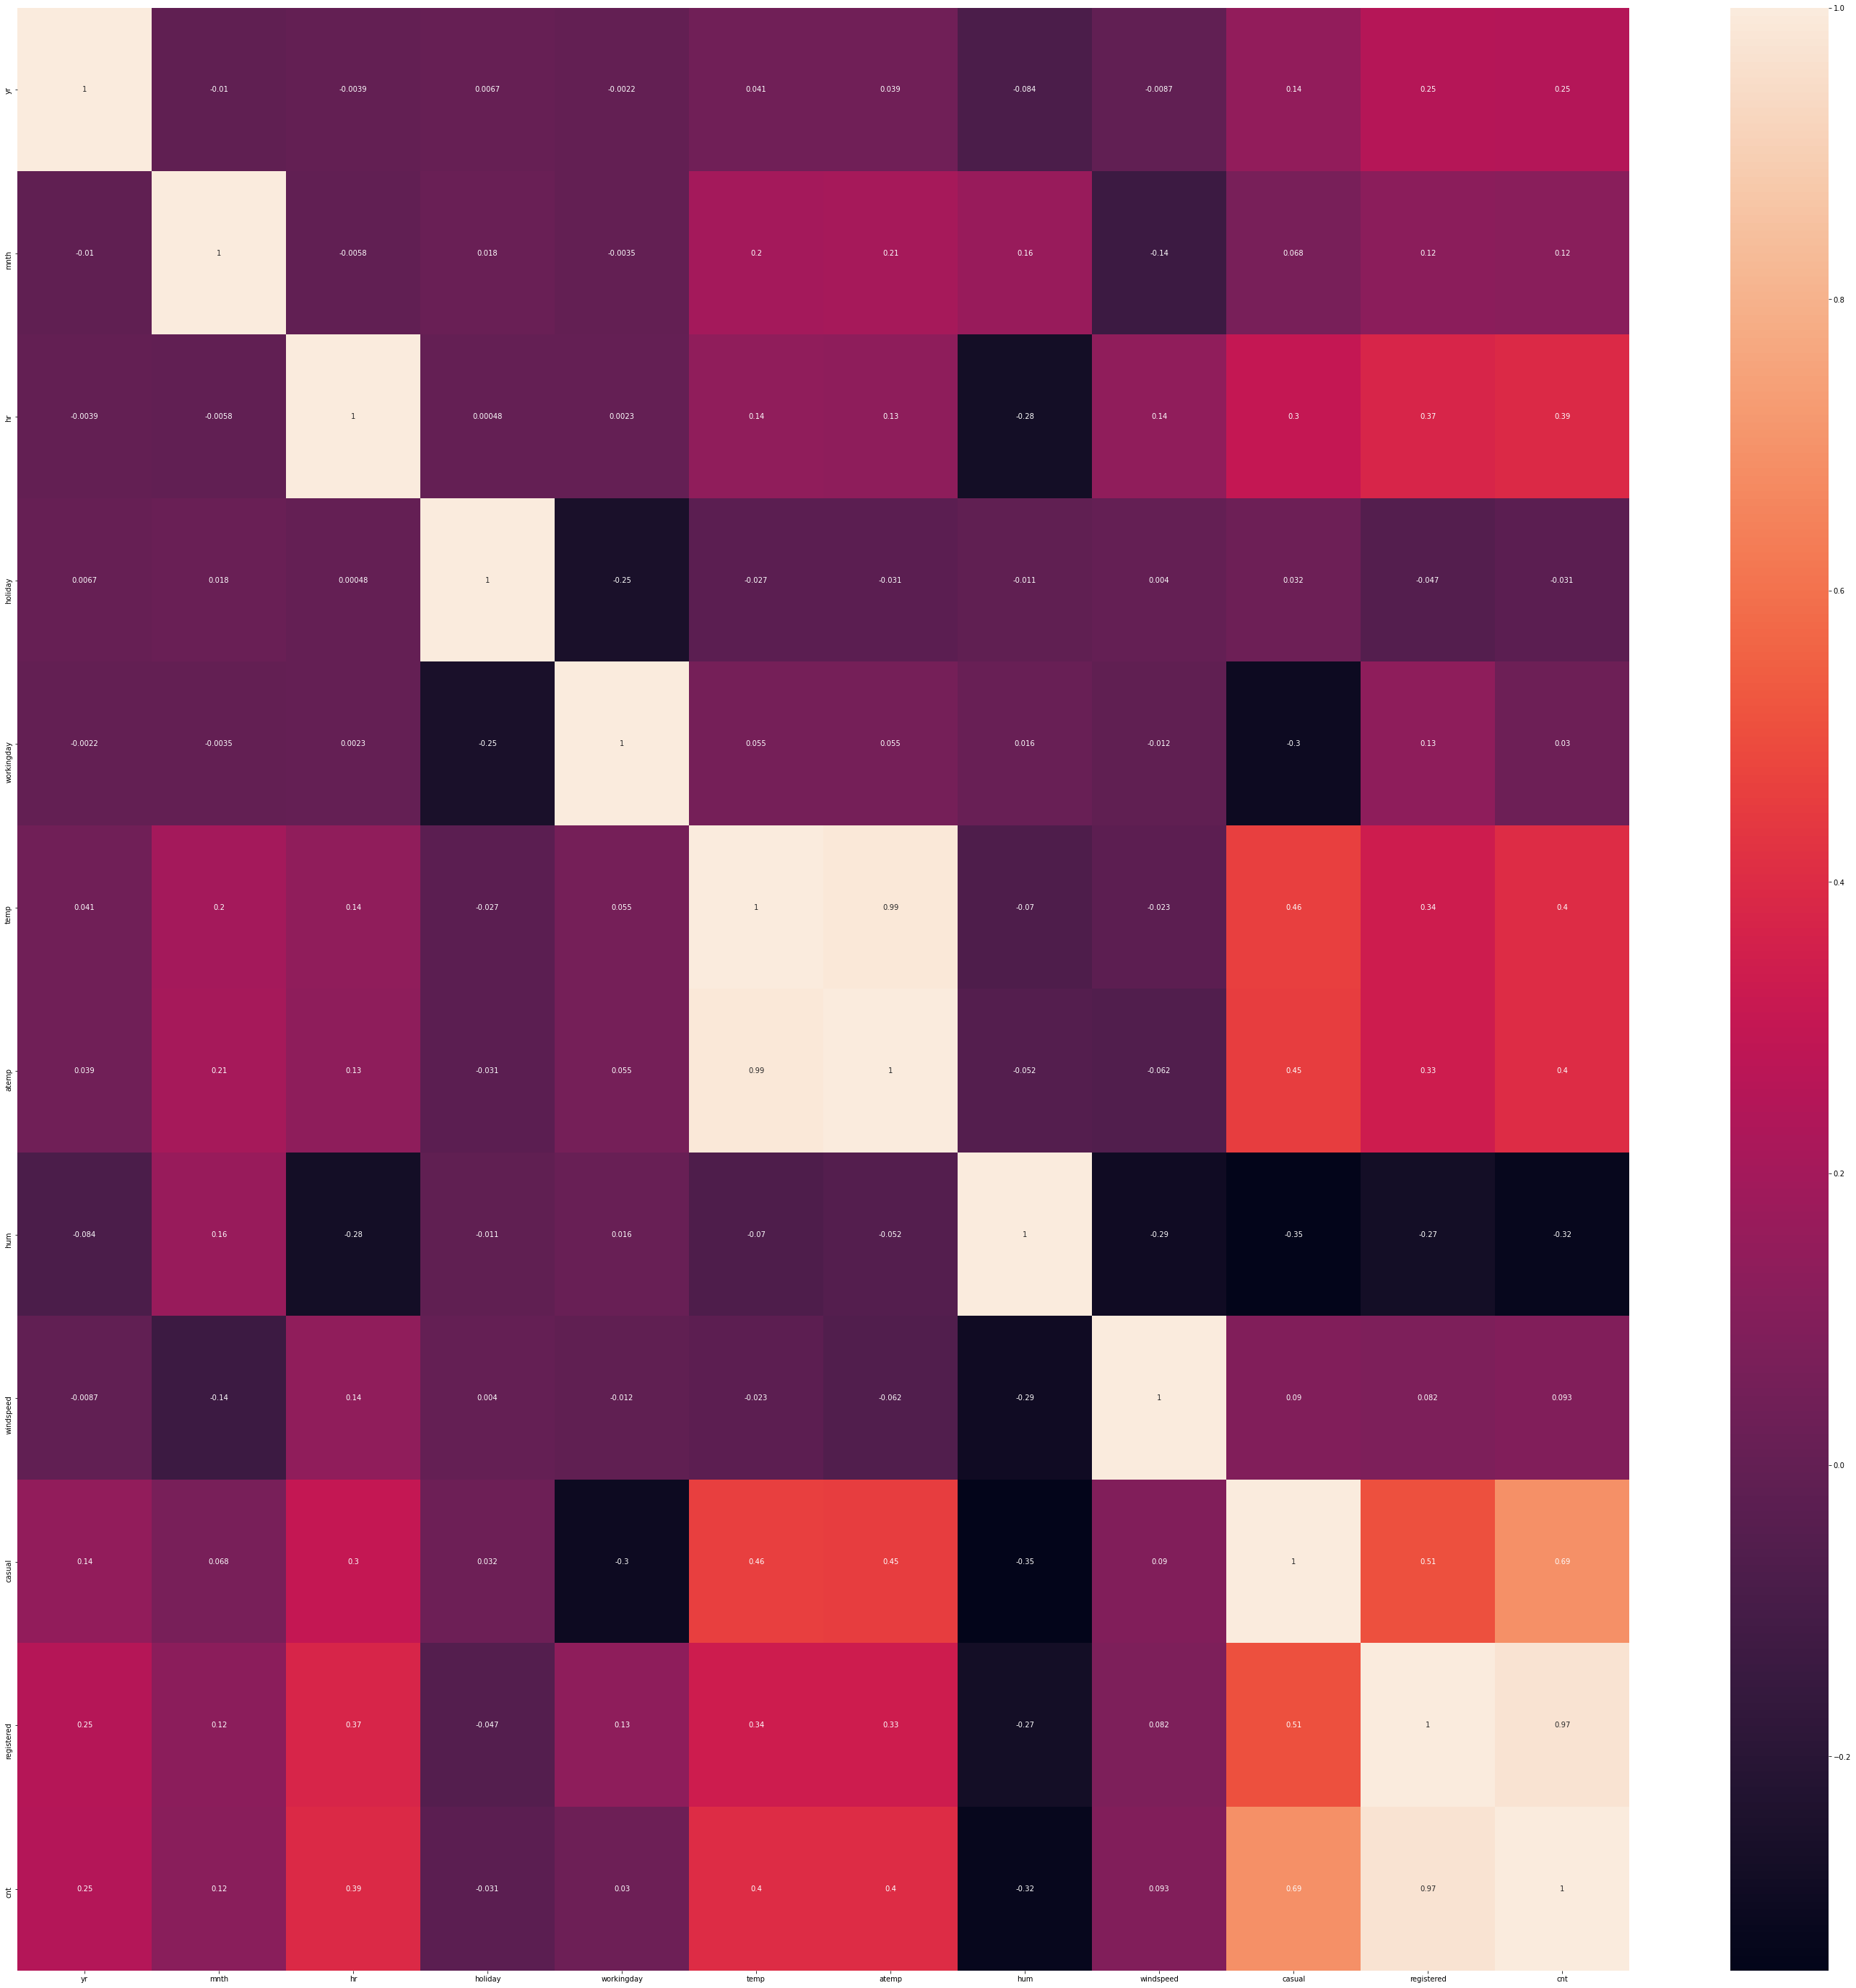

In [155]:
plt.figure(figsize=(50, 50)) #creeaza figura
sns.heatmap(df.corr(), annot=True) #corelatie heatmap in functie de toate coloanele

[Text(0.5, 1.0, 'Numărul de biciclete în timpul săptămânii și în weekend')]

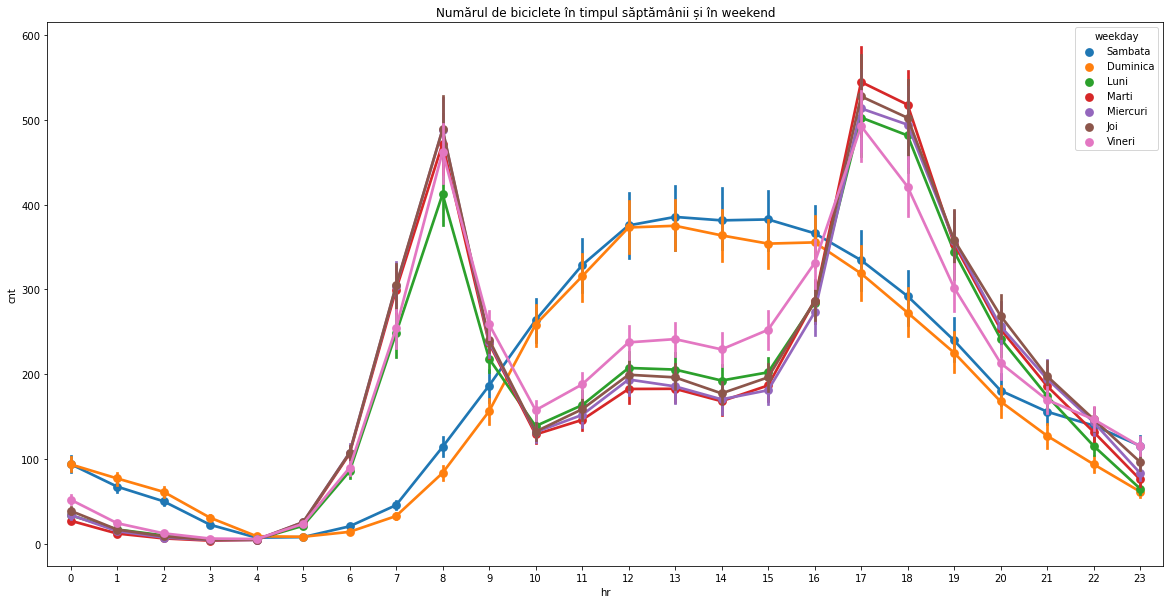

In [156]:
#o analiza 
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Numărul de biciclete în timpul săptămânii și în weekend')

Putem observa ca in weekend oameni inchiriaza biciclete incepand de la ora 9-10

Putem observa aici ca in timpul saptamanii oamenii iau biciclete pentru a pleca si reveni de la munca (ora 7,respectiv 17,18)

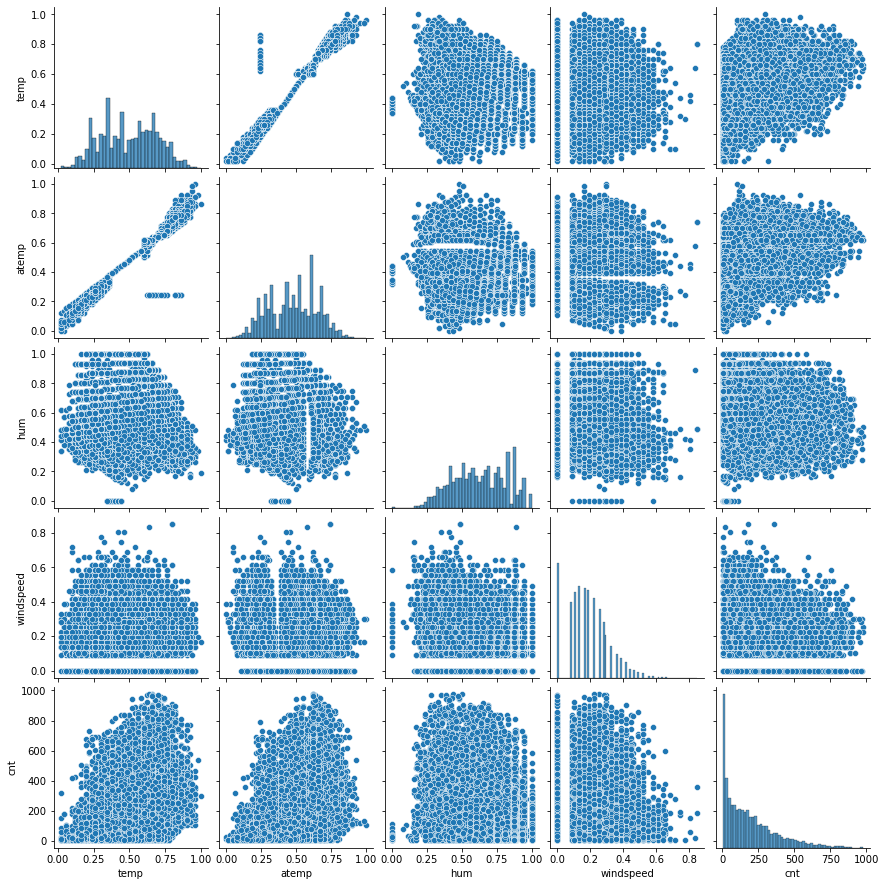

In [157]:
# Verificarea corelației în 5 variabile numerice
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

Ceea ce vedem mai jos sunt diagramele de dispersie a variabilelor…iar masuratorile se fac in pereche. Majoritatea corelatiilor sunt nule, exceptie face corelatia dintre temp si atemp care este pozitiva

[Text(0.5, 1.0, 'Relația dintre umiditate și utilizatori')]

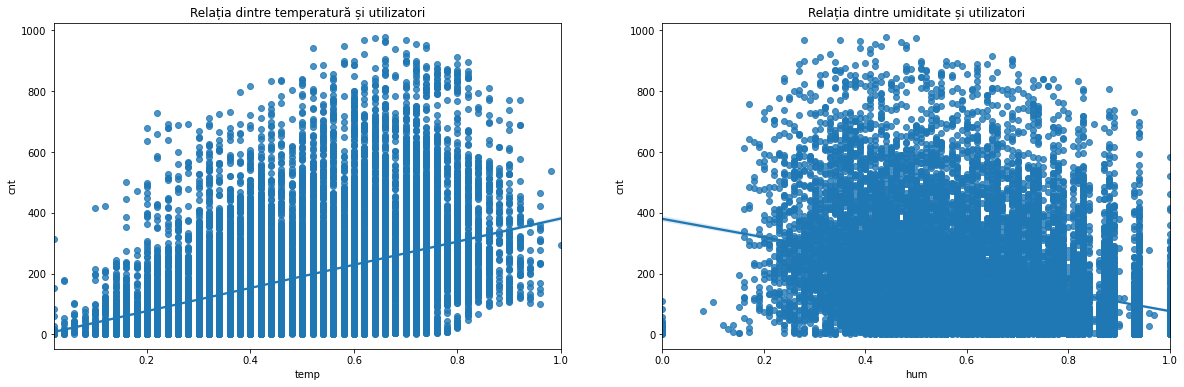

In [158]:
#regresie
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relația dintre temperatură și utilizatori")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relația dintre umiditate și utilizatori")

[Text(0.5, 1.0, 'Numărul de biciclete în timpul săptămânii și în weekend: utilizatori neînregistrați*care nu au aplicatia')]

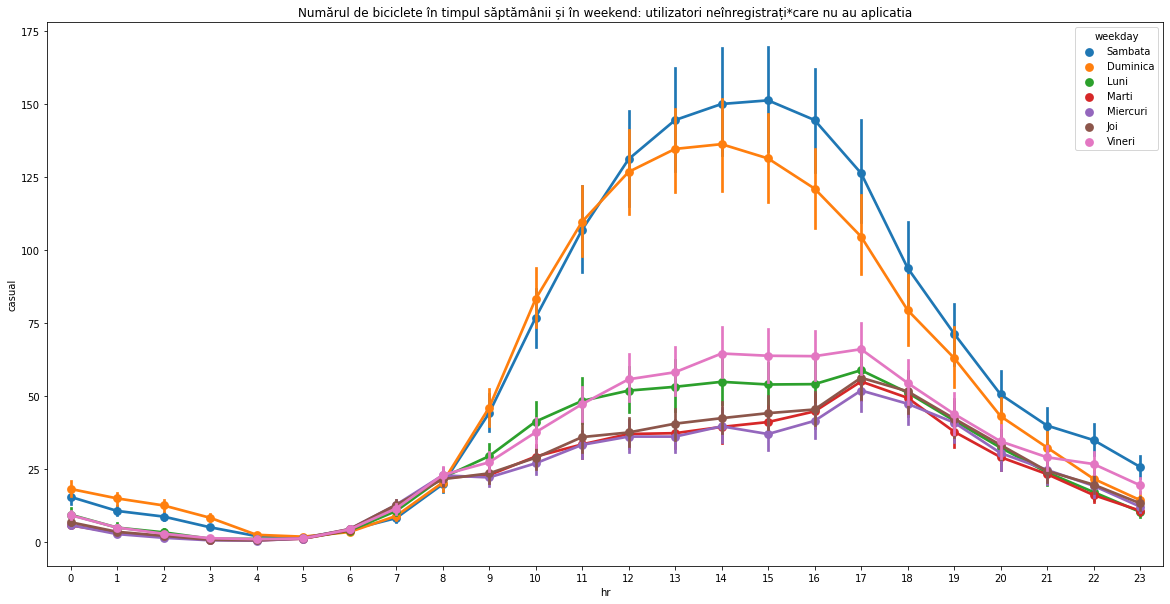

In [159]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în timpul săptămânii și în weekend: utilizatori neînregistrați care nu au aplicatia
sns.pointplot(data=df, x='hr', y='casual', hue='weekday', ax=ax)
ax.set(title='Numărul de biciclete în timpul săptămânii și în weekend: utilizatori neînregistrați*care nu au aplicatia')

Putem observa ca in weekend oamenii care nu au aplicatia de biciclete instalata,sunt mai multi decat in restu saptamanii

[Text(0.5, 1.0, 'Numărul de biciclete în timpul săptămânii și în weekend: utilizatori înregistrați')]

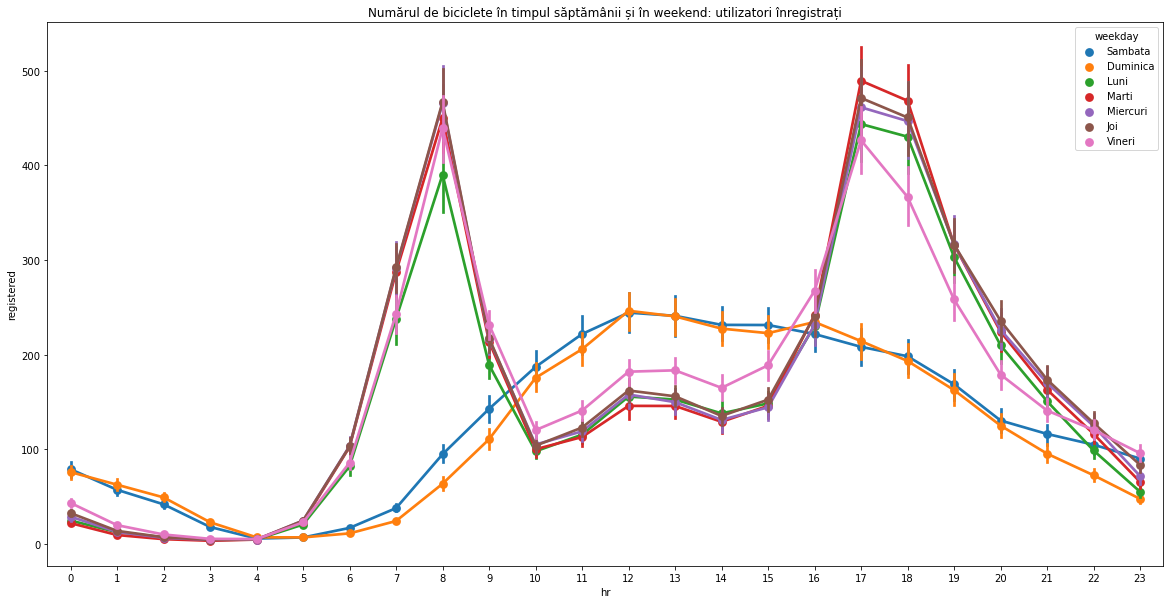

In [160]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în timpul săptămânii și în weekend: utilizatori înregistrați
sns.pointplot(data=df, x='hr', y='registered', hue='weekday', ax=ax)
ax.set(title='Numărul de biciclete în timpul săptămânii și în weekend: utilizatori înregistrați')

Vedem ca numarul de utilizatori inregistrati este mai mare in timpul saptamanii decat in weekend

[Text(0.5, 1.0, 'Numărul de biciclete în diferite vremi')]

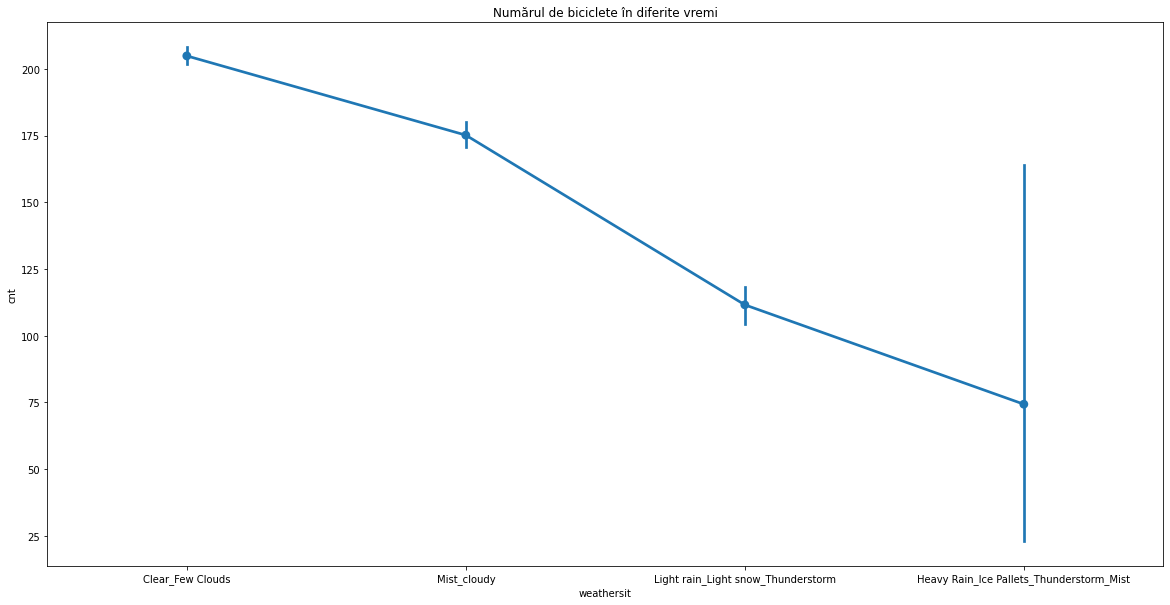

In [161]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în diferite vremi
sns.pointplot(data=df, x='weathersit', y='cnt', ax=ax)
ax.set(title='Numărul de biciclete în diferite vremi')

Putem observa aici numarul de biciclete afara in functie de diferite vremi(medie de 200 de oameni cand e soare si medie de 75 cand e vreme rea afara)

[Text(0.5, 1.0, 'Numărul de biciclete în diferite anotimpuri')]

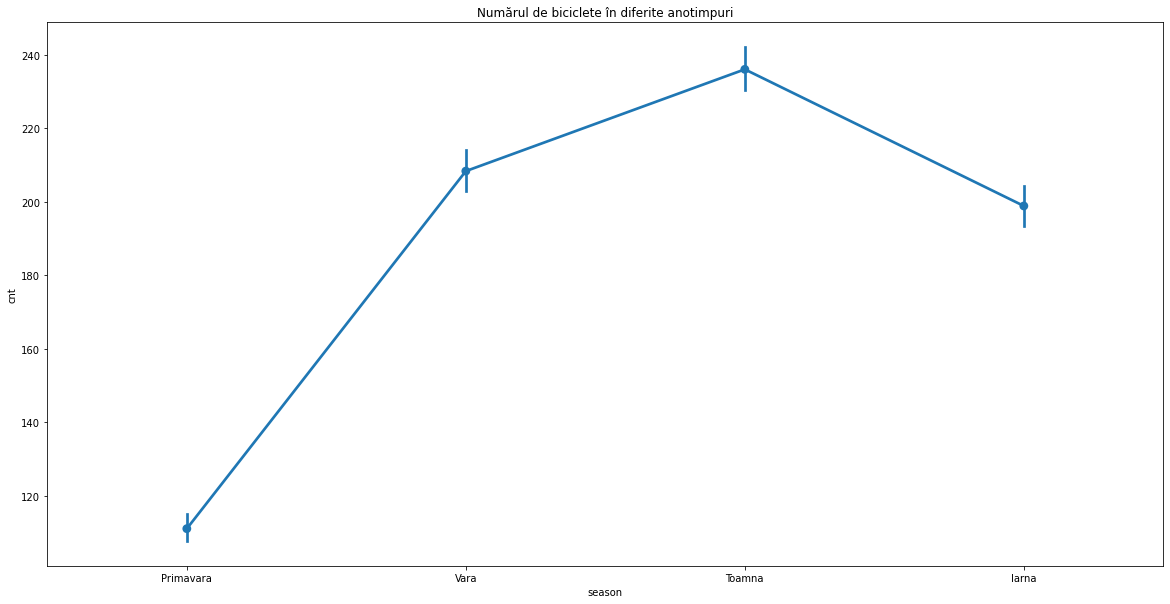

In [162]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în diferite anotimpuri
sns.pointplot(data=df, x='season', y='cnt', ax=ax)
ax.set(title='Numărul de biciclete în diferite anotimpuri')

Putem observa ca primavara nu prea se plimba oameni,in vara creste media la 200 iar in toamna atinge maximul de 240,si incepe sa scada iarna

[Text(0.5, 1.0, 'Numărul de biciclete în diferite luni')]

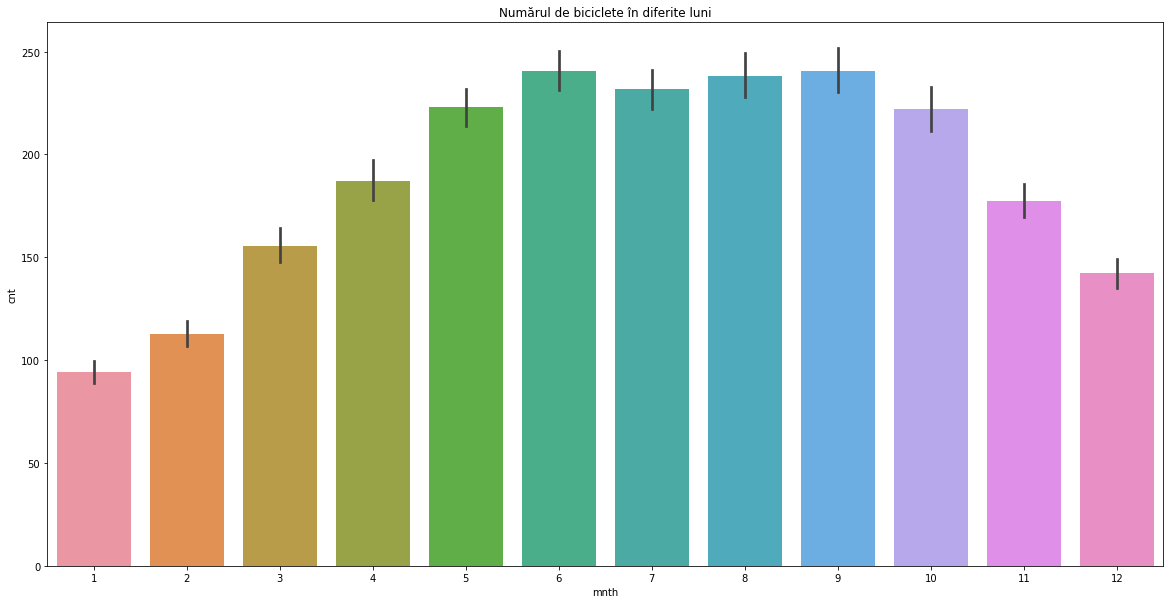

In [163]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în diferite luni
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Numărul de biciclete în diferite luni')

Putem observa ca in lunile de iarna bicicletele nu prea sunt folosite asa mult ca in restu anului

[Text(0.5, 1.0, 'Numărul de biciclete în diferite zile')]

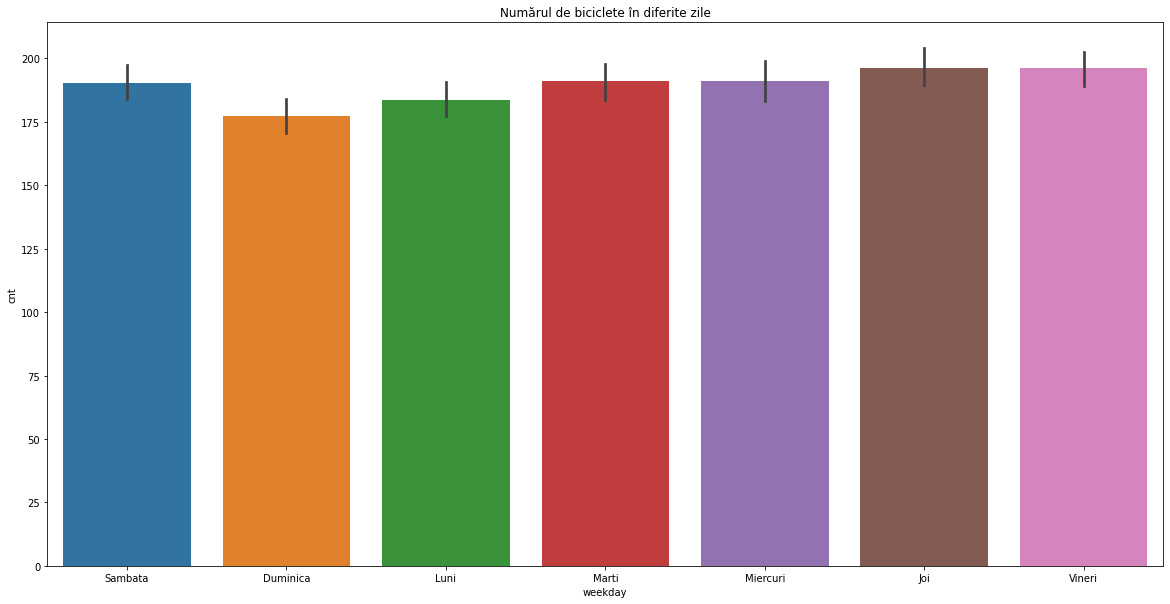

In [164]:
fig, ax = plt.subplots(figsize=(20,10))#afiseaza numărul de biciclete în diferite zile
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Numărul de biciclete în diferite zile')

Putem observa ca in ziua de duminica au fost cele mai putine folosite biciclete,iar joi ,cele mai multe

[Text(0.5, 1.0, 'Quantile teoretice')]

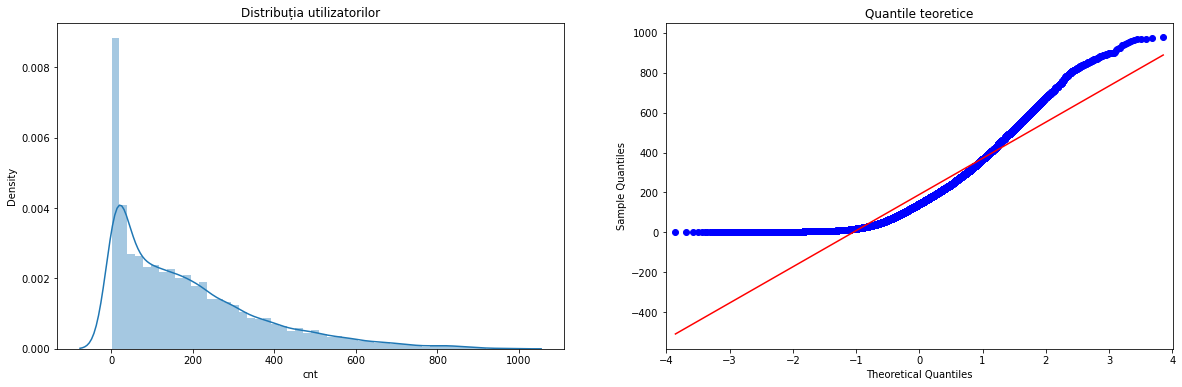

In [165]:
from statsmodels.graphics.gofplots import qqplot #afiseaza distributia utilizatorilor si quantilele teoretice
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['cnt'], ax=ax1)
ax1.set(title='Distribuția utilizatorilor')
qqplot(df['cnt'], ax=ax2, line='s')
ax2.set(title='Quantile teoretice')
#Dacă valoarea cuart este egală 0,1,2,3,4
#QUARTILE întoarce
#0-Valoarea minimă
#1-Prima cuartilă (a 25-a percentilă)
#2-Valoarea medie (a 50-a percentilă)
#3-A treia cuartilă (a 75-a percentilă)
#4-Valoarea maximă

In [166]:
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Primavara,0,1,0,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.81,0.0,16
1,Primavara,0,1,1,0,Sambata,0,Clear_Few Clouds,0.22,0.2727,0.80,0.0,40
2,Primavara,0,1,2,0,Sambata,0,Clear_Few Clouds,0.22,0.2727,0.80,0.0,32
3,Primavara,0,1,3,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.75,0.0,13
4,Primavara,0,1,4,0,Sambata,0,Clear_Few Clouds,0.24,0.2879,0.75,0.0,1


## temp și atemp sunt corelate în graficul perechilor de mai sus

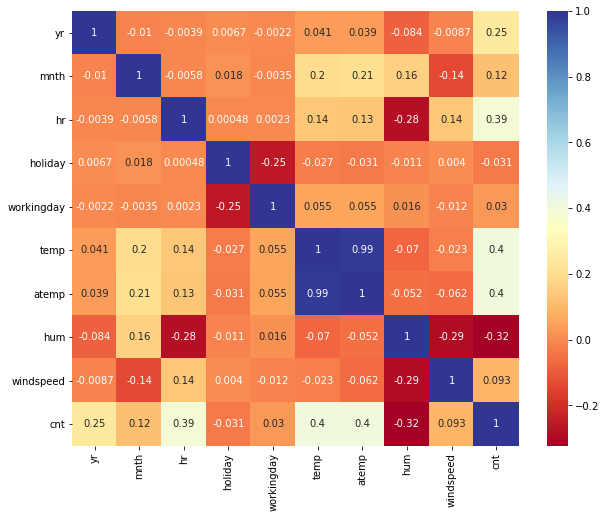

In [167]:
#verificam corelatia
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="RdYlBu")
plt.show()

Valorile care nu se coreleaza deloc sunt hum , winspeed  cnt,

Putem observa ca cele mai corelate valori sunt temp si atemp

In [168]:
#Corelatia dintre atemp si temp este ~1

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Primavara,0,1,0,0,Sambata,0,Clear_Few Clouds,0.2879,0.81,0.0,16
1,Primavara,0,1,1,0,Sambata,0,Clear_Few Clouds,0.2727,0.80,0.0,40
2,Primavara,0,1,2,0,Sambata,0,Clear_Few Clouds,0.2727,0.80,0.0,32
3,Primavara,0,1,3,0,Sambata,0,Clear_Few Clouds,0.2879,0.75,0.0,13
4,Primavara,0,1,4,0,Sambata,0,Clear_Few Clouds,0.2879,0.75,0.0,1


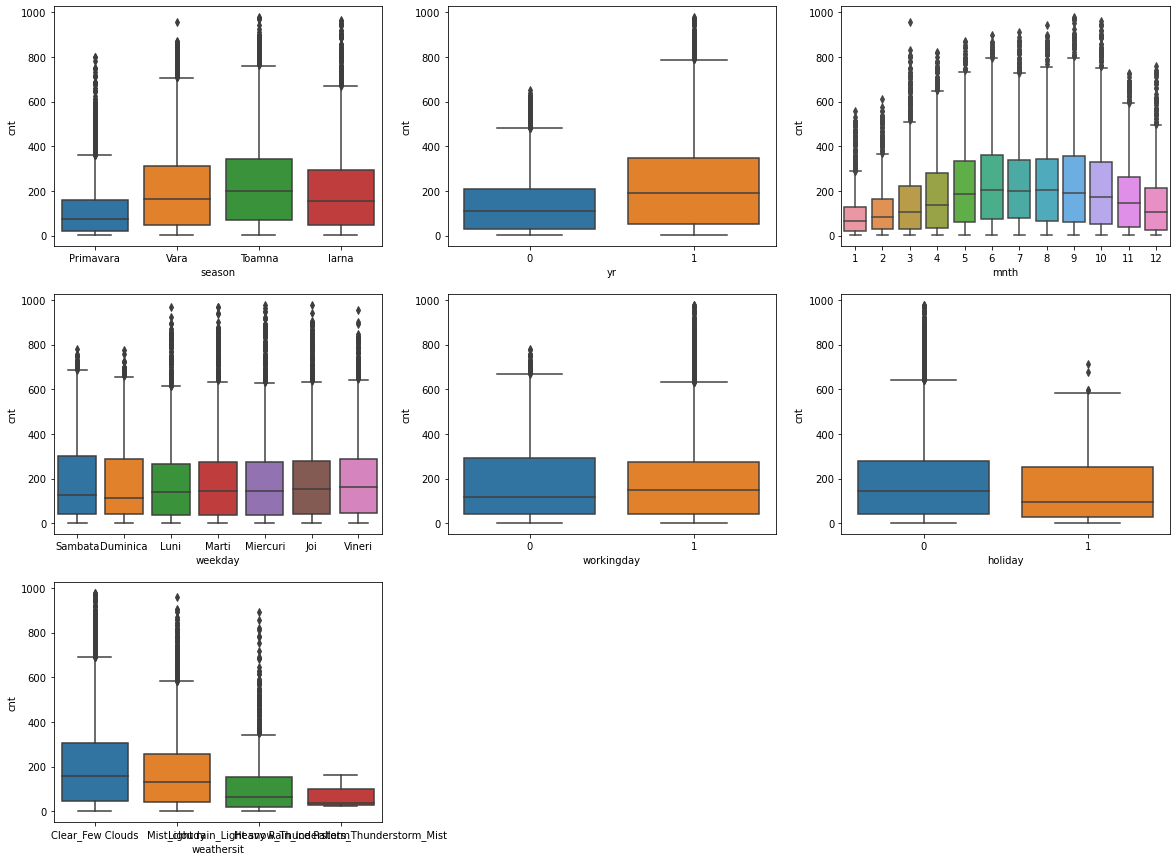

In [169]:
#Vizualizam variabilele categoriale 
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df) 
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

Din aceste vizualizari putem observa "cnt"-ul in season ca toamna a avut cele mai multe biciclete,cu yr ,in anul 1 adica 2012 au fost cele mai multe biciclete
Cnt ul cu mnth,in luna 6 au fost cele mai multe bicicleta

Cnt cu weekday,in ziua de sambata cele mai multe biciclete
Cnt cu workingday ,mai multe biciclete la 0 deoarece nu este weekend sau sarbatoare
Cnt cu weathersit ,cele mai multe biciclete pe vreme buna,iar putine pe vreme rea(ploaie,ninsoare)

## 3. Variabile Dummy

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  object 
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.6+ MB


In [41]:
# Transformarea in obiect
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  object 
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.6+ MB


In [42]:
df['season']

0        Primavara
1        Primavara
2        Primavara
3        Primavara
4        Primavara
           ...    
17374    Primavara
17375    Primavara
17376    Primavara
17377    Primavara
17378    Primavara
Name: season, Length: 17379, dtype: object

In [43]:
df['weathersit']

0        Clear_Few Clouds
1        Clear_Few Clouds
2        Clear_Few Clouds
3        Clear_Few Clouds
4        Clear_Few Clouds
               ...       
17374         Mist_cloudy
17375         Mist_cloudy
17376    Clear_Few Clouds
17377    Clear_Few Clouds
17378    Clear_Few Clouds
Name: weathersit, Length: 17379, dtype: object

In [44]:
df['weekday']

0        Sambata
1        Sambata
2        Sambata
3        Sambata
4        Sambata
          ...   
17374       Luni
17375       Luni
17376       Luni
17377       Luni
17378       Luni
Name: weekday, Length: 17379, dtype: object

In [45]:
df['mnth']

0         1
1         1
2         1
3         1
4         1
         ..
17374    12
17375    12
17376    12
17377    12
17378    12
Name: mnth, Length: 17379, dtype: object

In [46]:
# convertirea variabilelor categoriale în variabile dummy
SeasonCondition=pd.get_dummies(df['season'])#drop_first=True)
WeatherCondition=pd.get_dummies(df['weathersit'])#drop_first=True)
DayOfWeek=pd.get_dummies(df['weekday'])#drop_first=True)
MonthName=pd.get_dummies(df['mnth'])#drop_first=True)

In [47]:
SeasonCondition

,Iarna,Primavara,Toamna,Vara
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
17374,0,1,0,0
17375,0,1,0,0
17376,0,1,0,0
17377,0,1,0,0


In [48]:
WeatherCondition

,Clear_Few Clouds,Heavy Rain_Ice Pallets_Thunderstorm_Mist,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17374,0,0,0,1
17375,0,0,0,1
17376,1,0,0,0
17377,1,0,0,0


In [49]:
DayOfWeek

,Duminica,Joi,Luni,Marti,Miercuri,Sambata,Vineri
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17374,0,0,1,0,0,0,0
17375,0,0,1,0,0,0,0
17376,0,0,1,0,0,0,0
17377,0,0,1,0,0,0,0


In [50]:
MonthName

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,0,0,0,0,0,0,0,0,0,0,1
17375,0,0,0,0,0,0,0,0,0,0,0,1
17376,0,0,0,0,0,0,0,0,0,0,0,1
17377,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
#leaga mai multe campuri 
df=pd.concat([df,SeasonCondition],axis=1)
df=pd.concat([df,WeatherCondition],axis=1)
df=pd.concat([df,DayOfWeek],axis=1)
df=pd.concat([df,MonthName],axis=1)

In [52]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,...,3,4,5,6,7,8,9,10,11,12
0,Primavara,0,1,0,0,Sambata,0,Clear_Few Clouds,0.2879,0.81,...,0,0,0,0,0,0,0,0,0,0
1,Primavara,0,1,1,0,Sambata,0,Clear_Few Clouds,0.2727,0.80,...,0,0,0,0,0,0,0,0,0,0
2,Primavara,0,1,2,0,Sambata,0,Clear_Few Clouds,0.2727,0.80,...,0,0,0,0,0,0,0,0,0,0
3,Primavara,0,1,3,0,Sambata,0,Clear_Few Clouds,0.2879,0.75,...,0,0,0,0,0,0,0,0,0,0
4,Primavara,0,1,4,0,Sambata,0,Clear_Few Clouds,0.2879,0.75,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Renuntare la variabilele season, weathersit,weekday,mnth vechi
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,Iarna,Primavara,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0.2879,0.81,0.0,16,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0.2727,0.80,0.0,40,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0.2727,0.80,0.0,32,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0.2879,0.75,0.0,13,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0.2879,0.75,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


##  Împartirea datelor ajutatoare la regresii

In [54]:
# Importam biblioteca sklearn necesară pentru împărțirea datelor
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
df_train.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,Iarna,Primavara,...,3,4,5,6,7,8,9,10,11,12
8364,0,4,0,1,0.3636,0.53,0.1045,4,1,0,...,0,0,0,0,0,0,0,0,0,1
643,0,2,0,0,0.2273,0.80,0.0000,11,0,1,...,0,0,0,0,0,0,0,0,0,0
9518,1,13,0,1,0.3939,0.40,0.2239,141,0,1,...,0,0,0,0,0,0,0,0,0,0
7233,0,0,0,1,0.3636,0.76,0.0896,31,1,0,...,0,0,0,0,0,0,0,0,1,0
7443,0,18,1,0,0.3182,0.39,0.2537,208,1,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df_test.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,Iarna,Primavara,...,3,4,5,6,7,8,9,10,11,12
6052,0,18,0,1,0.6818,0.62,0.1642,586,0,0,...,0,0,0,0,0,0,1,0,0,0
6250,0,0,0,1,0.5455,0.94,0.0896,52,1,0,...,0,0,0,0,0,0,1,0,0,0
8110,0,14,0,1,0.3939,0.46,0.2836,187,1,0,...,0,0,0,0,0,0,0,0,0,1
7604,0,11,0,1,0.3030,0.36,0.1343,140,1,0,...,0,0,0,0,0,0,0,0,1,0
6356,0,10,0,1,0.5606,0.94,0.1642,122,1,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
df_train.columns

Index([                                      'yr',
                                             'hr',
                                        'holiday',
                                     'workingday',
                                          'atemp',
                                            'hum',
                                      'windspeed',
                                            'cnt',
                                          'Iarna',
                                      'Primavara',
                                         'Toamna',
                                           'Vara',
                               'Clear_Few Clouds',
       'Heavy Rain_Ice Pallets_Thunderstorm_Mist',
             'Light rain_Light snow_Thunderstorm',
                                    'Mist_cloudy',
                                       'Duminica',
                                            'Joi',
                                           'Luni',
                               

In [58]:
#Functia de scalare a variabilelor numerice
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
NumVar=['atemp','hum','windspeed','cnt']
df_train[NumVar] = scaler.fit_transform(df_train[NumVar])

In [60]:
df_train.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,Iarna,Primavara,...,3,4,5,6,7,8,9,10,11,12
8364,0,4,0,1,0.369212,0.53,0.122840,0.003074,1,0,...,0,0,0,0,0,0,0,0,0,1
643,0,2,0,0,0.230808,0.80,0.000000,0.010246,0,1,...,0,0,0,0,0,0,0,0,0,0
9518,1,13,0,1,0.399980,0.40,0.263195,0.143443,0,1,...,0,0,0,0,0,0,0,0,0,0
7233,0,0,0,1,0.369212,0.76,0.105325,0.030738,1,0,...,0,0,0,0,0,0,0,0,1,0
7443,0,18,1,0,0.323111,0.39,0.298225,0.212090,1,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
df_train.describe()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,Iarna,Primavara,...,3,4,5,6,7,8,9,10,11,12
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,...,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.500781,11.562433,0.028771,0.681134,0.485154,0.627601,0.222199,0.194161,0.244554,0.239704,...,0.086313,0.082367,0.084916,0.083683,0.087135,0.086313,0.083272,0.082614,0.085327,0.084176
std,0.500020,6.902286,0.167169,0.466056,0.174310,0.193206,0.142875,0.186013,0.429840,0.426920,...,0.280838,0.274935,0.278768,0.276923,0.282045,0.280838,0.276304,0.275309,0.279379,0.277663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.338444,0.480000,0.122840,0.039959,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,0.000000,1.000000,0.492283,0.630000,0.228047,0.145492,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,18.000000,0.000000,1.000000,0.630788,0.780000,0.298225,0.288934,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

In [63]:
X_train.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,Iarna,Primavara,Toamna,...,3,4,5,6,7,8,9,10,11,12
8364,0,4,0,1,0.369212,0.53,0.122840,1,0,0,...,0,0,0,0,0,0,0,0,0,1
643,0,2,0,0,0.230808,0.80,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9518,1,13,0,1,0.399980,0.40,0.263195,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7233,0,0,0,1,0.369212,0.76,0.105325,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7443,0,18,1,0,0.323111,0.39,0.298225,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
y_train.head()

8364    0.003074
643     0.010246
9518    0.143443
7233    0.030738
7443    0.212090
Name: cnt, dtype: float64

# Importam bibliotecă RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Luăm 15 variabile pentru metoda RFE(RFE= o cerere pentru mai multe documente )

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('hr', False, 12),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Iarna', True, 1),
 ('Primavara', True, 1),
 ('Toamna', False, 13),
 ('Vara', True, 1),
 ('Clear_Few Clouds', False, 9),
 ('Heavy Rain_Ice Pallets_Thunderstorm_Mist', True, 1),
 ('Light rain_Light snow_Thunderstorm', False, 8),
 ('Mist_cloudy', False, 18),
 ('Duminica', False, 17),
 ('Joi', False, 16),
 ('Luni', False, 14),
 ('Marti', False, 15),
 ('Miercuri', False, 19),
 ('Sambata', False, 10),
 ('Vineri', False, 20),
 (1, True, 1),
 (2, False, 2),
 (3, False, 7),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, True, 1),
 (8, True, 1),
 (9, False, 6),
 (10, False, 4),
 (11, False, 5),
 (12, False, 3)]

In [69]:
column = X_train.columns[rfe.support_]
column

Index([                                      'yr',
                                        'holiday',
                                          'atemp',
                                            'hum',
                                      'windspeed',
                                          'Iarna',
                                      'Primavara',
                                           'Vara',
       'Heavy Rain_Ice Pallets_Thunderstorm_Mist',
                                                1,
                                                4,
                                                5,
                                                6,
                                                7,
                                                8],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index([                                'hr',
                               'workingday',
                                   'Toamna',
                         'Clear_Few Clouds',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Duminica',
                                      'Joi',
                                     'Luni',
                                    'Marti',
                                 'Miercuri',
                                  'Sambata',
                                   'Vineri',
                                          2,
                                          3,
                                          9,
                                         10,
                                         11,
                                         12],
      dtype='object')

In [71]:
X_train_rfe = X_train[column]

In [72]:
# Model folosind Statsmodels, importam biblioteca si adaugam constanta

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [73]:
#OLS cea mai buna forma
# Regresia obișnuită cu cele mai mici pătrate.
#Regresia cu cele mai mici pătrate obișnuite (OLS) este o tehnică comună pentru estimarea coeficienților ecuațiilor de regresie liniară care descriu relația dintre una sau mai multe variabile cantitative independente și o variabilă dependentă (regresia liniară simplă sau multiplă
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [74]:
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     408.1
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:                 5681.7
No. Observations:               12165   AIC:                        -1.133e+04
Df Residuals:                   12149   BIC:                        -1.121e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0713      0.012      5.928      0.000       0.048       0.095
yr                                           0.0776      0.003     28.009      0.000       0.072       0.083
holiday                                     -0.0324      0.008     -3.914      0.000      -0.049      -0.016
atemp                                        0.5408      0.014     38.796      0.000       0.513       0.568
hum                                         -0.2821      0.008    -36.349      0.000      -0.297      -0.267
windspeed                                    0.0576      0.010      5.647      0.000       0.038       0.078
Iarna                                        0.0409      0.006      6.596      0.000       0.029       0.053
Primavara                                   -0.0164      0.007     -2.305      0.021      -0.030      -0.002
Vara                                         0.0273      0.007      3.769      0.000       0.013       0.041
Heavy Rain_Ice Pallets_Thunderstorm_Mist     0.0819      0.088      0.932      0.351      -0.090       0.254
1                                            0.0194      0.006      3.150      0.002       0.007       0.031
4                                           -0.0456      0.008     -5.635      0.000      -0.062      -0.030
5                                           -0.0411      0.008     -4.980      0.000      -0.057      -0.025
6                                           -0.0810      0.007    -10.969      0.000      -0.096      -0.067
7                                           -0.1027      0.007    -14.177      0.000      -0.117      -0.088
8                                           -0.0552      0.007     -7.810      0.000      -0.069      -0.041
==============================================================================
Omnibus:                     1877.878   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3160.270
Skew:                           1.028   Prob(JB):                         0.00
Kurtosis:                       4.416   Cond. No.                         94.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Identificam VIF pentru multicoliniaritate

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Multicoliniaritatea apare atunci când există două sau mai multe variabile independente într-un model de regresie multiplă, care au o corelație mare între ele.
#Pentru a detecta multicoliniaritatea, o metodă este calcularea factorului de inflație a variației (VIF). 
#Orice caracteristică care are un VIF mai mare de 5 ar trebui să fie eliminată din setul de date de antrenament cum facem noi mai jos.

#1 — datele nu sunt corelate
#1<VIF<5 — datele sunt moderat corelate
#VIF>5 — datele sunt corelate la nivel inalt
#VIF>10 — corelatiile sunt prea mari si sunt cauza de ingrijorare

,Features,VIF
2,atemp,13.13
3,hum,8.70
7,Vara,6.01
4,windspeed,3.46
6,Primavara,3.29
5,Iarna,3.08
11,5,3.04
10,4,2.82
12,6,2.41
13,7,2.34


In [76]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,Iarna,Primavara,Vara,Heavy Rain_Ice Pallets_Thunderstorm_Mist,1,4,5,6,7,8
8364,1.0,0,0,0.369212,0.53,0.122840,1,0,0,0,0,0,0,0,0,0
643,1.0,0,0,0.230808,0.80,0.000000,0,1,0,0,1,0,0,0,0,0
9518,1.0,1,0,0.399980,0.40,0.263195,0,1,0,0,0,0,0,0,0,0
7233,1.0,0,0,0.369212,0.76,0.105325,1,0,0,0,0,0,0,0,0,0
7443,1.0,0,1,0.323111,0.39,0.298225,1,0,0,0,0,0,0,0,0,0


In [77]:
# scădem variabila „hum” 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [78]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [79]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [80]:
lm1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     309.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:                 5053.8
No. Observations:               12165   AIC:                        -1.008e+04
Df Residuals:                   12150   BIC:                            -9966.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1931      0.010    -19.157      0.000      -0.213      -0.173
yr                                           0.0867      0.003     29.844      0.000       0.081       0.092
holiday                                     -0.0283      0.009     -3.255      0.001      -0.045      -0.011
atemp                                        0.6142      0.015     42.292      0.000       0.586       0.643
windspeed                                    0.1613      0.010     15.642      0.000       0.141       0.182
Iarna                                        0.0602      0.007      9.254      0.000       0.047       0.073
Primavara                                    0.0276      0.007      3.747      0.000       0.013       0.042
Vara                                         0.0408      0.008      5.362      0.000       0.026       0.056
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0009      0.092     -0.010      0.992      -0.182       0.180
1                                            0.0285      0.006      4.403      0.000       0.016       0.041
4                                           -0.0263      0.009     -3.093      0.002      -0.043      -0.010
5                                           -0.0540      0.009     -6.218      0.000      -0.071      -0.037
6                                           -0.0615      0.008     -7.923      0.000      -0.077      -0.046
7                                           -0.0839      0.008    -11.037      0.000      -0.099      -0.069
8                                           -0.0450      0.007     -6.044      0.000      -0.060      -0.030
==============================================================================
Omnibus:                     1570.980   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2389.088
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                       4.106   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,9.49
6,Vara,5.66
3,windspeed,3.41
10,5,3.04
9,4,2.82
5,Primavara,2.66
4,Iarna,2.43
11,6,2.40
12,7,2.34
13,8,2.13


In [82]:
# Scadem variabila "atemp"
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [83]:
#construim un model de regresie liniara
#valoarea P sau valoarea probabilității arată semnificatia statistic
#R patrat este o valoare simplăa dar puternica, care arata cat de multa varianta este explicata de model
#coef sunt coeficientii variabilelor care ne ofera ecuatia modelului
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:                 4218.5
No. Observations:               12165   AIC:                            -8409.
Df Residuals:                   12151   BIC:                            -8305.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1492      0.006     23.167      0.000       0.137       0.162
yr                                           0.0960      0.003     30.934      0.000       0.090       0.102
holiday                                     -0.0236      0.009     -2.530      0.011      -0.042      -0.005
windspeed                                    0.1773      0.011     16.056      0.000       0.156       0.199
Iarna                                       -0.0301      0.007     -4.578      0.000      -0.043      -0.017
Primavara                                   -0.1186      0.007    -17.011      0.000      -0.132      -0.105
Vara                                        -0.0428      0.008     -5.439      0.000      -0.058      -0.027
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0347      0.099     -0.351      0.726      -0.229       0.159
1                                           -0.0272      0.007     -4.014      0.000      -0.041      -0.014
4                                           -0.0085      0.009     -0.937      0.349      -0.026       0.009
5                                            0.0316      0.009      3.498      0.000       0.014       0.049
6                                            0.0431      0.008      5.466      0.000       0.028       0.058
7                                            0.0059      0.008      0.760      0.448      -0.009       0.021
8                                            0.0107      0.008      1.367      0.172      -0.005       0.026
==============================================================================
Omnibus:                     1554.266   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2305.394
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                       3.993   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Vara,5.48
2,windspeed,3.07
9,5,2.74
8,4,2.73
4,Primavara,2.32
0,yr,1.88
10,6,1.83
3,Iarna,1.61
7,1,1.48
12,8,1.22


In [85]:
# Scadem variabila "windspeed"(# dropping variable "windspeed" due to very high vif, dropping vif >2 and re-process the model)
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [86]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     159.7
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                 4090.8
No. Observations:               12165   AIC:                            -8156.
Df Residuals:                   12152   BIC:                            -8059.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1866      0.006     30.759      0.000       0.175       0.198
yr                                           0.0954      0.003     30.423      0.000       0.089       0.102
holiday                                     -0.0230      0.009     -2.439      0.015      -0.041      -0.005
Iarna                                       -0.0317      0.007     -4.768      0.000      -0.045      -0.019
Primavara                                   -0.1109      0.007    -15.780      0.000      -0.125      -0.097
Vara                                        -0.0388      0.008     -4.874      0.000      -0.054      -0.023
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0354      0.100     -0.354      0.723      -0.231       0.161
1                                           -0.0287      0.007     -4.196      0.000      -0.042      -0.015
4                                           -0.0012      0.009     -0.129      0.897      -0.019       0.017
5                                            0.0285      0.009      3.118      0.002       0.011       0.046
6                                            0.0417      0.008      5.236      0.000       0.026       0.057
7                                            0.0036      0.008      0.453      0.650      -0.012       0.019
8                                            0.0093      0.008      1.174      0.241      -0.006       0.025
==============================================================================
Omnibus:                     1500.656   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2185.392
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       3.929   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Scadem variabila "4" 
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [88]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                 4090.8
No. Observations:               12165   AIC:                            -8158.
Df Residuals:                   12153   BIC:                            -8069.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1864      0.006     31.558      0.000       0.175       0.198
yr                                           0.0954      0.003     30.424      0.000       0.089       0.102
holiday                                     -0.0230      0.009     -2.441      0.015      -0.041      -0.005
Iarna                                       -0.0315      0.007     -4.848      0.000      -0.044      -0.019
Primavara                                   -0.1107      0.007    -16.072      0.000      -0.124      -0.097
Vara                                        -0.0393      0.007     -6.032      0.000      -0.052      -0.027
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0354      0.100     -0.354      0.723      -0.231       0.161
1                                           -0.0287      0.007     -4.196      0.000      -0.042      -0.015
5                                            0.0293      0.007      4.211      0.000       0.016       0.043
6                                            0.0422      0.007      6.395      0.000       0.029       0.055
7                                            0.0038      0.008      0.483      0.629      -0.011       0.019
8                                            0.0095      0.008      1.215      0.224      -0.006       0.025
==============================================================================
Omnibus:                     1500.885   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2185.963
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       3.930   Cond. No.                         78.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Vara,2.11
0,yr,1.86
3,Primavara,1.72
7,5,1.65
6,1,1.48
8,6,1.30
2,Iarna,1.23
9,7,1.08
10,8,1.08
1,holiday,1.03


In [90]:
# Adăugăm variabile pentru a verifica dacă modelul se îmbunătățește, alegem "Saturday"

X_train_rfe['Sambata']=X_train['Sambata']
X_train_rfe.head()

,yr,holiday,Iarna,Primavara,Vara,Heavy Rain_Ice Pallets_Thunderstorm_Mist,1,5,6,7,8,Sambata
8364,0,0,1,0,0,0,0,0,0,0,0,0
643,0,0,0,1,0,0,1,0,0,0,0,0
9518,1,0,0,1,0,0,0,0,0,0,0,0
7233,0,0,1,0,0,0,0,0,0,0,0,0
7443,0,1,1,0,0,0,0,0,0,0,0,0


In [91]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     159.9
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                 4091.6
No. Observations:               12165   AIC:                            -8157.
Df Residuals:                   12152   BIC:                            -8061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1854      0.006     31.162      0.000       0.174       0.197
yr                                           0.0954      0.003     30.426      0.000       0.089       0.102
holiday                                     -0.0221      0.009     -2.340      0.019      -0.041      -0.004
Iarna                                       -0.0315      0.007     -4.835      0.000      -0.044      -0.019
Primavara                                   -0.1107      0.007    -16.070      0.000      -0.124      -0.097
Vara                                        -0.0393      0.007     -6.019      0.000      -0.052      -0.026
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0364      0.100     -0.364      0.716      -0.232       0.160
1                                           -0.0288      0.007     -4.201      0.000      -0.042      -0.015
5                                            0.0293      0.007      4.221      0.000       0.016       0.043
6                                            0.0423      0.007      6.403      0.000       0.029       0.055
7                                            0.0038      0.008      0.492      0.623      -0.011       0.019
8                                            0.0097      0.008      1.241      0.215      -0.006       0.025
Sambata                                      0.0058      0.004      1.306      0.192      -0.003       0.015
==============================================================================
Omnibus:                     1503.032   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.545
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       3.935   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#"Saturday" nu funcționează deoarece are valori ridicate deci renuntam la ea
X_train_rfe=X_train_rfe.drop(['Sambata'],axis=1)

In [93]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                 4090.8
No. Observations:               12165   AIC:                            -8158.
Df Residuals:                   12153   BIC:                            -8069.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1864      0.006     31.558      0.000       0.175       0.198
yr                                           0.0954      0.003     30.424      0.000       0.089       0.102
holiday                                     -0.0230      0.009     -2.441      0.015      -0.041      -0.005
Iarna                                       -0.0315      0.007     -4.848      0.000      -0.044      -0.019
Primavara                                   -0.1107      0.007    -16.072      0.000      -0.124      -0.097
Vara                                        -0.0393      0.007     -6.032      0.000      -0.052      -0.027
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0354      0.100     -0.354      0.723      -0.231       0.161
1                                           -0.0287      0.007     -4.196      0.000      -0.042      -0.015
5                                            0.0293      0.007      4.211      0.000       0.016       0.043
6                                            0.0422      0.007      6.395      0.000       0.029       0.055
7                                            0.0038      0.008      0.483      0.629      -0.011       0.019
8                                            0.0095      0.008      1.215      0.224      -0.006       0.025
==============================================================================
Omnibus:                     1500.885   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2185.963
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       3.930   Cond. No.                         78.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Vara,2.11
0,yr,1.86
3,Primavara,1.72
7,5,1.65
6,1,1.48
8,6,1.30
2,Iarna,1.23
9,7,1.08
10,8,1.08
1,holiday,1.03


In [95]:
#Sa luam "Sunday", verificam modelul
X_train_rfe['Duminica']=X_train['Duminica']
X_train_rfe.head()

,yr,holiday,Iarna,Primavara,Vara,Heavy Rain_Ice Pallets_Thunderstorm_Mist,1,5,6,7,8,Duminica
8364,0,0,1,0,0,0,0,0,0,0,0,0
643,0,0,0,1,0,0,1,0,0,0,0,1
9518,1,0,0,1,0,0,0,0,0,0,0,0
7233,0,0,1,0,0,0,0,0,0,0,0,0
7443,0,1,1,0,0,0,0,0,0,0,0,0


In [96]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:55:51   Log-Likelihood:                 4094.8
No. Observations:               12165   AIC:                            -8164.
Df Residuals:                   12152   BIC:                            -8067.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1881      0.006     31.692      0.000       0.176       0.200
yr                                           0.0955      0.003     30.446      0.000       0.089       0.102
holiday                                     -0.0249      0.009     -2.642      0.008      -0.043      -0.006
Iarna                                       -0.0314      0.007     -4.826      0.000      -0.044      -0.019
Primavara                                   -0.1106      0.007    -16.056      0.000      -0.124      -0.097
Vara                                        -0.0392      0.007     -6.018      0.000      -0.052      -0.026
Heavy Rain_Ice Pallets_Thunderstorm_Mist    -0.0377      0.100     -0.377      0.706      -0.234       0.158
1                                           -0.0283      0.007     -4.135      0.000      -0.042      -0.015
5                                            0.0293      0.007      4.221      0.000       0.016       0.043
6                                            0.0421      0.007      6.381      0.000       0.029       0.055
7                                            0.0041      0.008      0.528      0.597      -0.011       0.019
8                                            0.0094      0.008      1.204      0.229      -0.006       0.025
Duminica                                    -0.0127      0.004     -2.845      0.004      -0.021      -0.004
==============================================================================
Omnibus:                     1489.582   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2160.552
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                       3.915   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#"Sunday" nu funcționează deoarece are valori ridicate deci renuntam la ea
X_train_rfe=X_train_rfe.drop(['Duminica'],axis=1)

In [98]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Vara,2.11
0,yr,1.86
3,Primavara,1.72
7,5,1.65
6,1,1.48
8,6,1.30
2,Iarna,1.23
9,7,1.08
10,8,1.08
1,holiday,1.03


# REGRESII

Am facut regresie din documentul copiat principal dfq1

In [109]:
X1 = dfq1["season"].values.reshape(-1, 1)
y1 = dfq1["cnt"].values
print(X1)
print (y1)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[16 40 32 ... 90 61 49]


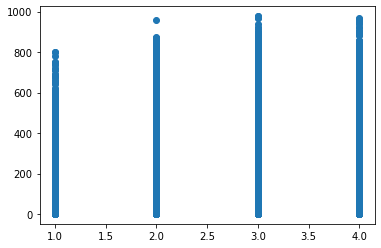

In [110]:
plt.scatter(X1,y1)

Detalii pentru fiecare anotimp,respectiv 1,2,3 si 4


In [111]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=10)

print(X1_train)
print (y1_train)

[[4]
 [1]
 [2]
 ...
 [1]
 [4]
 [4]]
[232  65 287 ... 144 227 372]


In [113]:
lm = LinearRegression()
model1 = lm.fit(X1_train, y1_train)

print('alfa= ', model1.intercept_)
print('lista=', model1.coef_)

alfa=  117.13573812169449
b0= [29.23041608]


cnt= 117.135+29.230 * season

In [114]:
y1_prezis = model1.predict(X1_test)

print("Mean absolute error:", metrics.mean_absolute_error(y1_test,y1_prezis))
print("Mean squared error: ", metrics.mean_squared_error(y1_test,y1_prezis))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y1_test,y1_prezis)))
r1_patrat = model1.score(X1_train, y1_train)
print("r^2", r1_patrat)

Mean absolute error: 139.1186768473345
Mean squared error:  31248.08877086356
Root mean squared error:  176.77128944164988
r^2 0.031520994408589686


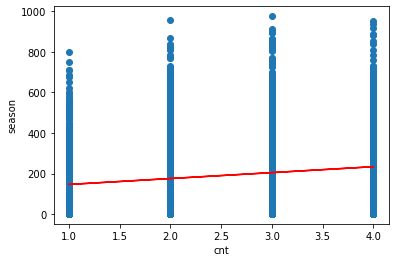

In [117]:
plt.xlabel("cnt")
plt.ylabel("season")
plt.scatter(X1_test, y1_test)
plt.plot(X1_train, 117.13 + 29.2 * X1_train, 'r')
plt.show()

Trendline pentru cnt si season

# Regresie liniara multipla


In [121]:
vremea = ["season","weathersit","temp","atemp","hum"]
X2 = dfq1[vremea]
y2 = dfq1['cnt']
print(X2)
print (y2)

       season  weathersit  temp   atemp   hum
0           1           1  0.24  0.2879  0.81
1           1           1  0.22  0.2727  0.80
2           1           1  0.22  0.2727  0.80
3           1           1  0.24  0.2879  0.75
4           1           1  0.24  0.2879  0.75
...       ...         ...   ...     ...   ...
17374       1           2  0.26  0.2576  0.60
17375       1           2  0.26  0.2576  0.60
17376       1           1  0.26  0.2576  0.60
17377       1           1  0.26  0.2727  0.56
17378       1           1  0.26  0.2727  0.65

[17379 rows x 5 columns]
0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64


In [122]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, test_size=0.3, random_state=10)

In [124]:
lm = LinearRegression()
model2 = lm.fit(X2_train, y2_train)

print('alfa= ', model2.intercept_)
print('b0=', model2.coef_)

alfa=  152.76605095809225
b0= [  19.76090575    9.02605558  123.35372622  233.75287723 -315.01027155]


In [125]:
y2_prezis = model2.predict(X2_test)

In [128]:
print("Mean absolute error: ", metrics.mean_absolute_error(y2_test,y2_prezis))
print("Mean squared error: ", metrics.mean_squared_error(y2_test,y2_prezis))
print("Root mean squared error: ", np.sqrt(metrics.mean_squared_error(y2_test,y2_prezis)))
r2_patrat = model2.score(X2_train, y2_train)
print("r^2", r2_patrat)
#Se poate vedea ca r^2 are o valoare foarte mica ceea ce inseamna ca variabilele independente nu sunt foarte corelate cu cnt

Mean absolute error:  116.26348950448192
Mean squared error:  23673.233940126313
Root mean squared error:  153.86108650378858
r^2 0.26477343880547943


In [127]:
actual_vs_prezis = pd.DataFrame({"Actual: ":y2_test,'Prezis':y2_prezis})
actual_vs_prezis

,Actual:,Prezis
6557,374,263.487333
11737,126,126.168172
4952,24,248.755028
2853,365,254.398928
3697,90,185.096668
...,...,...
16465,154,264.790354
10818,143,131.652473
15106,300,336.755600
10764,307,259.480288


Valorile actuale sunt in general apropiate de cele prezise